 # <center>ADS Project </center>

## Problem Description

Predicting the price of a stock is a commun field for ml. Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones.

**Problem Statement**:
Predicting the price of a stock is a commun field for ml. 
Our problem setting is to predict the Ethereum Price for the next day, week and month based on its network data is an interesting problem. 
For that we want to use different Forcasting Methods an want to evaluate them. Also we want to know which of the features are the most relevant ones. 

**Target Variable**: Ethereum Price

**Models**:
- Autoregressive Integrated Moving Average (ARIMA)
- LSTM
- Holt Winter’s Exponential Smoothing (HWES) 
- FB Prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ads = pd.read_csv('cleaned_data.csv',index_col='Date')

In [3]:
df_ads.head()

,Supply,AddressCount,Uncles,BtcPrice,Price
Date,,,,,
2015-07-30,0.000000,0.000000,0.595431,0.003951,0.0
2015-07-31,0.001017,0.000002,0.195431,0.003779,0.0
2015-08-01,0.001796,0.000004,0.105584,0.003611,0.0
2015-08-02,0.002589,0.000005,0.136041,0.003658,0.0
2015-08-03,0.003375,0.000006,0.160914,0.003669,0.0


======================================================================================

# ARIMA

In [4]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose

df_ads = pd.read_csv('cleaned_data.csv',index_col='Date')
# or we will have to copy it at the beginning of each model coz df_ads was changed by previous model

df_ads.index = pd.to_datetime(df_ads.index)
df_ads.index = pd.DatetimeIndex(df_ads.index.values, freq='D')
df_arima = df_ads
df_arima.index.name = 'Date'

df_arima.tail()

,Supply,AddressCount,Uncles,BtcPrice,Price
Date,,,,,
2019-09-02,0.998479,0.996546,0.162944,0.529808,178.76
2019-09-03,0.998857,0.997430,0.140609,0.543579,179.13
2019-09-04,0.999236,0.998217,0.139594,0.541274,175.01
2019-09-05,0.999619,0.999130,0.155838,0.541207,174.38
2019-09-06,1.000000,1.000000,0.175635,0.527744,177.13


In [5]:
from scipy import stats
import statsmodels.api as sm
from itertools import product
from datetime import datetime

In [6]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [7]:
endog = df_ads['Price']
df_exog = df_ads.drop(axis=1, columns='Price')

train_start,train_end = '2015-07-30','2018-06-01'
test_start,test_end = '2018-06-02','2019-09-06'

endog_train = df_ads['Price'][train_start:train_end].dropna()
endog_test = df_ads['Price'][test_start:test_end].dropna()

exog_train = df_ads.drop(['Price'],axis = 1)[train_start:train_end].dropna()
exog_test = df_ads.drop(['Price'],axis = 1)[test_start:test_end].dropna()

In [8]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
AIC_list = pd.DataFrame({}, columns=['param','param_seasonal','AIC'])
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(endog_train, #df_arima
                                            order=param,
                                            exog = exog_train,
                                            seasonal_order=param_seasonal,
                                            freq='D',
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
           
            results = mod.fit()

            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            temp = pd.DataFrame([[ param ,  param_seasonal , results.aic ]], columns=['param','param_seasonal','AIC'])
            AIC_list = AIC_list.append( temp, ignore_index=True)
            del temp

        except:
            continue


m = np.amin(AIC_list['AIC'].values) # Find minimum value in AIC
l = AIC_list['AIC'].tolist().index(m) # Find index number for lowest AIC
Min_AIC_list = AIC_list.iloc[l,:]

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:12387.489435909938
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:11727.745002653024
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:11626.446170949392
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:11494.187461635716
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:11543.598769859596
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:11484.097861346747
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:11504.525151911253
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:11496.07977174257
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:11123.205850036193
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:10589.555115836156
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:10633.504338539591
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:10528.766018510414
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:10507.303501489914
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:10464.638347172535
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:10544.482094180888
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:10532.196564603126
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:9072.703385781497
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:8973.355449774466
ARIMA(0, 1, 0)x(0, 1, 0, 12) - 

In [9]:
Min_AIC_list
#param                 (1, 1, 1)
#param_seasonal    (0, 1, 1, 12)
#AIC                       8893.67
#Name: 59, dtype: object

param                 (1, 1, 1)
param_seasonal    (1, 1, 1, 12)
AIC                     8893.67
Name: 63, dtype: object

### Min_AIC_list ### 
param                 (1, 1, 1)
param_seasonal    (1, 1, 1, 12)
AIC                     8893.67
Name: 63, dtype: object
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Supply       -1.104e+04   9249.985     -1.193      0.233   -2.92e+04    7090.401
AddressCount  5870.0258    573.872     10.229      0.000    4745.258    6994.794
Uncles          18.2221     11.440      1.593      0.111      -4.201      40.645
BtcPrice       810.0359     11.217     72.216      0.000     788.051     832.021
ar.L1           -0.2999      0.045     -6.682      0.000      -0.388      -0.212
ma.L1            0.5370      0.041     13.004      0.000       0.456       0.618
ar.S.L12        -0.1054      0.016     -6.495      0.000      -0.137      -0.074
ma.S.L12        -0.9411      0.010    -96.055      0.000      -0.960      -0.922
sigma2         371.8185      5.791     64.202   

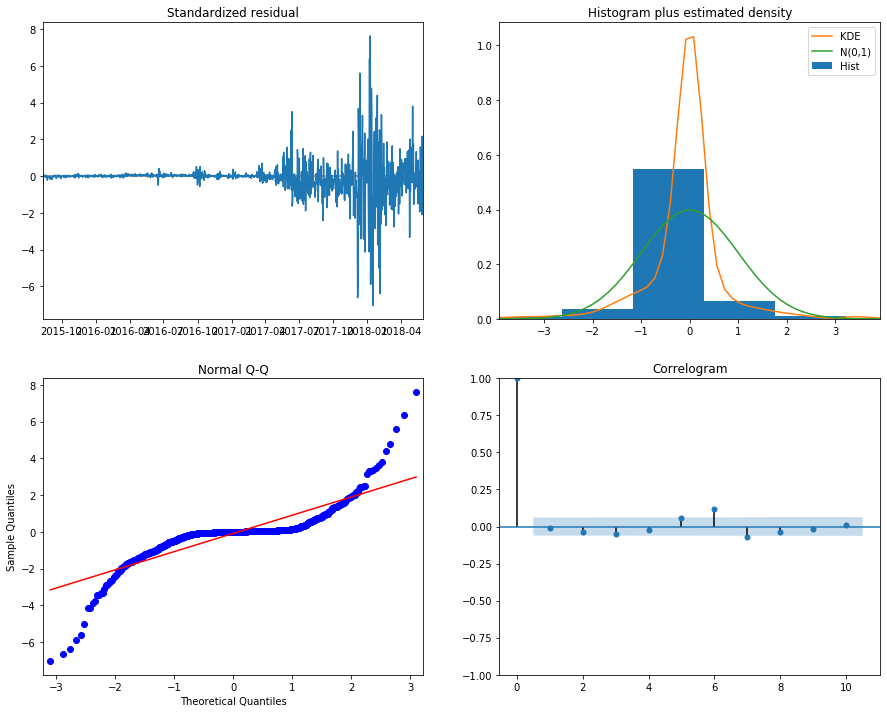

In [10]:
mod = sm.tsa.statespace.SARIMAX(endog_train,
                        exog=exog_train,
                        order=Min_AIC_list['param'],
                        seasonal_order=Min_AIC_list['param_seasonal'],
                        enforce_stationarity=True,
                        enforce_invertibility=False,
                        freq='D')

results = mod.fit()

print("### Min_AIC_list ### \n{}".format(Min_AIC_list))

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [43]:
pred = results.get_prediction(start=pd.to_datetime('2018-06-01'),end=pd.to_datetime('2019-09-06'),exog = exog_test, dynamic=False)
pred_ci = pred.conf_int()

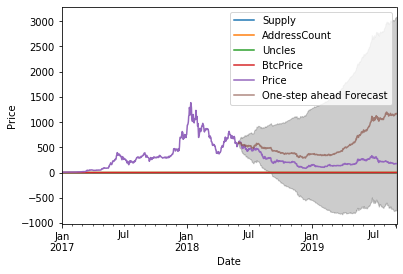

In [44]:
ax = df_ads['2017':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [45]:
df_arima_forecasted = pred.predicted_mean.to_frame()
df_arima_forecasted.columns=['Price']
df_arima_forecasted.index.names = ['Date']

df_arima_truth = df_ads['2018-06-01':]


# Compute the mean square error
mse = ((df_arima_forecasted - df_arima_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is AddressCount          NaN
BtcPrice              NaN
Price           191723.81
Supply                NaN
Uncles                NaN
dtype: float64


In [46]:
exog_test.to_csv('exog_t.csv',index=True)

In [47]:
exog_others = pd.read_csv('exog_others.csv',index_col='Date')
exog_others.index = pd.to_datetime(exog_others.index)
exog_others.index = pd.DatetimeIndex(exog_others.index.values,
                               freq='D')
exog_others.index.name = 'Date'
#exog_others.head()
exog_others

,Supply,AddressCount,Uncles,BtcPrice
Date,,,,
2019-09-07,0.979276,0.968515,0.147208,0.588975
2019-09-08,0.988547,0.969728,0.153807,0.616831
2019-09-09,0.988927,0.970755,0.162944,0.626118
2019-09-10,0.989307,0.993130,0.146193,0.620797
2019-09-11,0.989693,0.973048,0.157868,0.580278
2019-09-12,0.990073,0.974296,0.142640,0.140609
2019-09-13,0.990458,0.975696,0.148223,0.584443
2019-09-14,0.990839,0.977071,0.148731,0.558244
2019-09-15,0.991223,0.978194,0.162944,0.514161


In [48]:
# Get forecast 32 steps ahead in future
pred_uc = results.get_forecast(steps=32,exog=exog_others)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

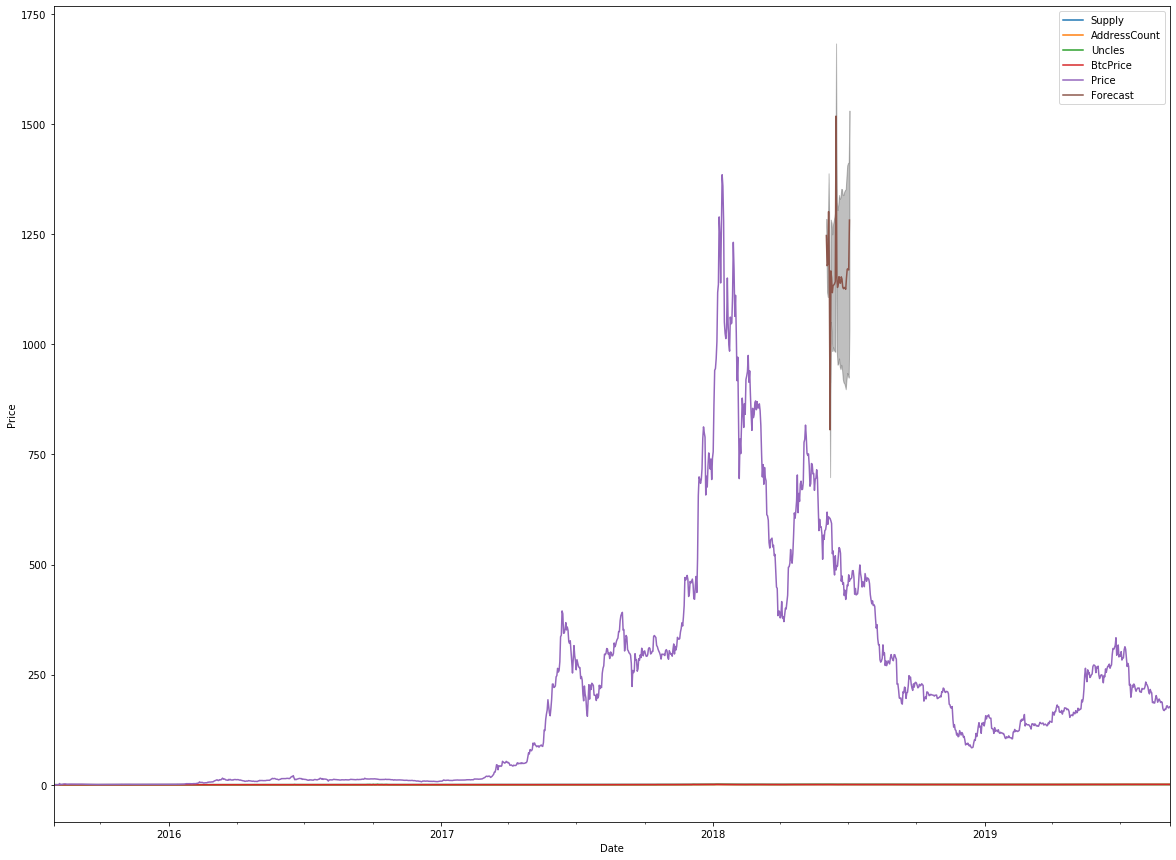

In [49]:
ax = df_ads.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [50]:
pred.predicted_mean.head()

Date
2018-06-01    592.676721
2018-06-02    578.686638
2018-06-03    586.829514
2018-06-04    572.810078
2018-06-05    574.752254
Freq: D, dtype: float64

In [51]:
df_arima_truth.head()

,Supply,AddressCount,Uncles,BtcPrice,Price
Date,,,,,
2018-06-01,0.780103,0.505835,0.715228,0.382532,579.01
2018-06-02,0.780685,0.506945,0.758376,0.388584,590.53
2018-06-03,0.781261,0.508237,0.727411,0.392906,619.04
2018-06-04,0.781845,0.509443,0.769543,0.381147,591.31
2018-06-05,0.782417,0.510664,0.714213,0.387795,608.23


In [52]:
pred_ci.head()

,lower Price,upper Price
2018-06-02,1209.222951,1284.809468
2018-06-03,1118.332639,1238.568502
2018-06-04,1107.553717,1256.630525
2018-06-05,1214.321537,1388.326694
2018-06-06,1059.447758,1255.011504


In [42]:
pred_uc.predicted_mean.head()

2018-06-02    1247.016209
2018-06-03    1178.450571
2018-06-04    1182.092121
2018-06-05    1301.324115
2018-06-06    1157.229631
Freq: D, dtype: float64

In [22]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# Chart the data
ether_prices = go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean)
py.iplot([ether_prices])

=-=-=-=-=-=-=-=-=-==-----